<a href="https://colab.research.google.com/github/rghimre3/Ramesh_ghimire_INFO-5502_summer2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [11]:
### You code here:
import pandas as pd
import numpy as np
import csv as csv
import os 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#dataframe for bike share data 
df = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv")
df.head()

df.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    9174 non-null   object 
 1   season      9174 non-null   int64  
 2   holiday     9174 non-null   int64  
 3   workingday  9174 non-null   int64  
 4   weather     9174 non-null   int64  
 5   temp        9174 non-null   float64
 6   atemp       9174 non-null   float64
 7   humidity    9174 non-null   int64  
 8   windspeed   9174 non-null   float64
 9   casual      9174 non-null   int64  
 10  registered  9174 non-null   int64  
 11  count       9174 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 860.2+ KB
None


In [3]:
print(df.describe())

            season      holiday   workingday      weather         temp  \
count  9174.000000  9174.000000  9174.000000  9174.000000  9174.000000   
mean      2.505559     0.031284     0.678875     1.414868    20.130401   
std       1.116618     0.174094     0.466934     0.635363     7.940504   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    20.500000   
75%       4.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    41.000000   

             atemp     humidity    windspeed       casual   registered  \
count  9174.000000  9174.000000  9174.000000  9174.000000  9174.000000   
mean     23.578433    61.715064    12.737931    35.713647   154.868106   
std       8.617957    19.401829     8.199027    49.667738   150.981155   
min       0.760000     0.000000     0

In [5]:
df['datetime']=pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [8]:
df['season'] = df['season'].replace(1,'Spring')
df['season'] = df['season'].replace(2,'Summer')
df['season'] = df['season'].replace(3,'Fall')
df['season'] = df['season'].replace(4,'Winter')
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1
5,2011-01-01 05:00:00,Spring,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,1
6,2011-01-01 06:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1,1
7,2011-01-01 07:00:00,Spring,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1,1
8,2011-01-01 08:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1,1
9,2011-01-01 09:00:00,Spring,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1,1


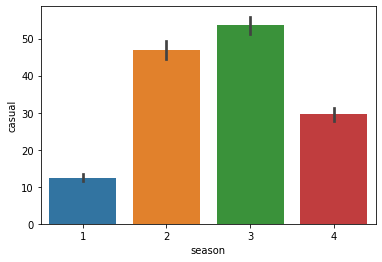

In [14]:
sns.barplot(x ='season', y ='casual', data = df, palette ='tab10')


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [ ]:
### You code here:

